In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai as fai
import fastai.vision as fv
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import numpy as np
from pathlib import Path
import random
import gc

from torch.utils.data import Dataset
from torchvision import transforms, utils

import PIL


In [22]:
def is_listy(x): 
    return isinstance(x, (list,tuple))

class AgeSexItem(fai.ItemBase):
    def __init__(self,array): 
        self.data = np.array(array).astype(np.float32)

    def __str__(self): 
        L = ["Male", "Female"]
        return str(self.data[0]) + " / " +  L[int(self.data[1] > 0.5)]

class AgeSexList(fai.ItemList):
    def __init__(self, items:fai.Iterator, **kwargs):
        super().__init__(np.array(items, dtype=np.float32), **kwargs)
        

        self.c = items.shape[1]

    def get(self, i):
        o = super().get(i)
        return AgeSexItem(o)

    def reconstruct(self,t):
        if is_listy(t):
            return AgeSexItem(np.array(t))
        return AgeSexItem(t.numpy())

In [23]:
def extract_age_sex(filename):
    f=filename.stem.split('_')
    return float(f[0]), float(f[1])

In [24]:
def load_face_data(img_size, batch_size, amount=1.):
    tfms = fv.get_transforms(max_warp=0.) # deberíamos añadir max_warp=0.!! Ver imágenes de abajo!
    return (fv.ImageItemList.from_folder(path)
            .filter_by_rand(amount, seed=666)
            .random_split_by_pct(0.1, seed=666)
            .label_from_func(extract_age_sex, label_cls=AgeSexList)
            .transform(tfms, size=img_size)
            .databunch(bs=batch_size))

In [25]:
data = load_face_data(192,64,amount=0.2)

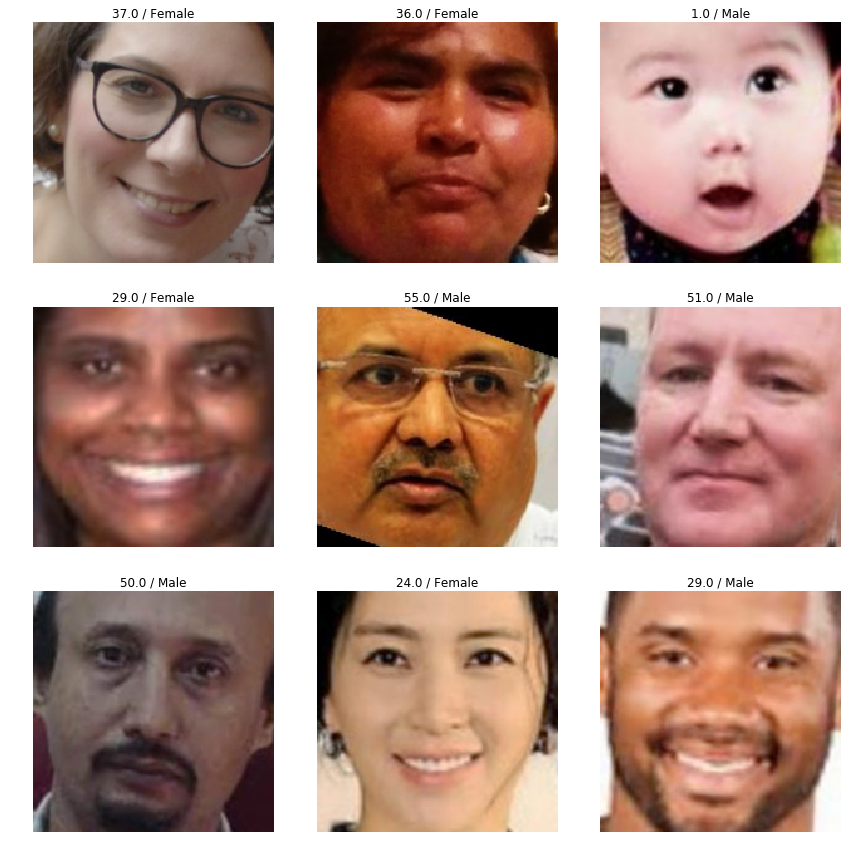

In [26]:
data.show_batch(rows=3)

In [30]:
def age_sex_loss(pred, targ):
    # tu llena aqui
    return 0.

In [29]:
learn = fai.Learner(data, model, loss_func=age_sex_loss, wd=0.1)

# Entrena aquí

In [36]:
# learn.fit_one_cycle(1,1e-3)

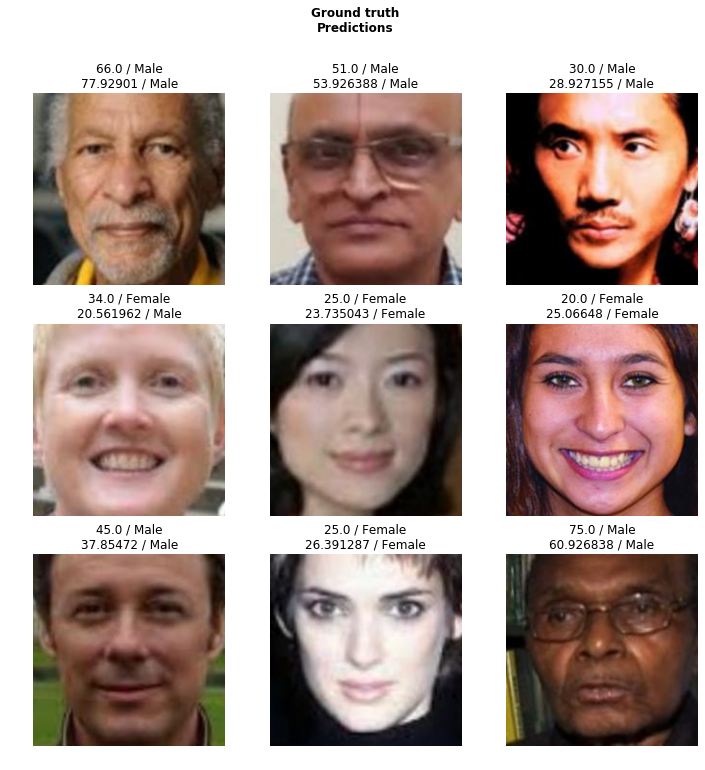

In [35]:
learn.show_results(rows=3)